In [1]:
from sklearn import svm 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
iris=datasets.load_iris()
features=iris.data
target=iris.target

In [4]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
target_names=iris.target_names
labels=target_names[target]

In [6]:
labels

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [7]:
#擷取三種花 個別特徵
setosa_petal_length=features[labels=='setosa',2] # 2代表com第三個
setosa_petal_width=features[labels=='setosa',3]  # 3代表com第四個
setosa=np.c_[setosa_petal_length,setosa_petal_width]
versicolor_petal_length=features[labels=='versicolor',2]
versicolor_petal_width=features[labels=='versicolor',3]
versicolor=np.c_[versicolor_petal_length,versicolor_petal_width]
virginica_petal_length=features[labels=='virginica',2]
virginica_petal_width=features[labels=='virginica',3]
virginica=np.c_[virginica_petal_length,virginica_petal_width]

In [8]:
features#(花萼長度與寬度,花瓣長度與寬度)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

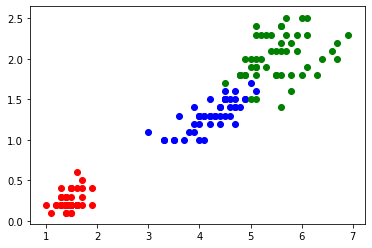

In [9]:
plt.scatter(setosa[:,0],setosa[:,1],color='red') #第一特徵與第二特徵為紅色
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')

In [10]:
training_data=np.r_[setosa, versicolor, virginica]
training_labels=np.r_[np.zeros(len(setosa)),np.ones(len(versicolor)),np.ones(len(virginica))*2]

In [11]:
training_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [12]:
clf=svm.LinearSVC()
clf.fit(training_data,training_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

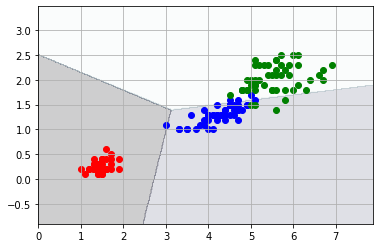

In [13]:
training_x_min=training_data[:,0].min()-1 #目標是要沒有樣本點的地方被預測到 X軸與Y軸找最大最小值 去+1-1
training_x_max=training_data[:,0].max()+1
training_y_min=training_data[:,1].min()-1
training_y_max=training_data[:,1].max()+1
grid_interval=0.02 #0.02間隔去拆分
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
plt.autoscale()
plt.grid()
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')
plt.show()

# 重要參數
### C: 懲罰係數，C愈大代表容忍錯誤的程度愈低，愈容易造成過度擬和的問題。
### gamma: 決定支援向量的多寡，影響訓練速度與預測速度 ('scale','auto') 
### kernel: 決定不同的核函數，如: linear, poly, rbf, sigmoid等等

In [14]:
def SVM_plot(clf,title):
    training_x_min=training_data[:,0].min()-1
    training_x_max=training_data[:,0].max()+1
    training_y_min=training_data[:,1].min()-1
    training_y_max=training_data[:,1].max()+1
    grid_interval=0.02
    xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
    plt.autoscale()
    plt.grid()
    plt.scatter(setosa[:,0],setosa[:,1],color='red')
    plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
    plt.scatter(virginica[:,0],virginica[:,1],color='green')
    plt.title(title)
    plt.show()

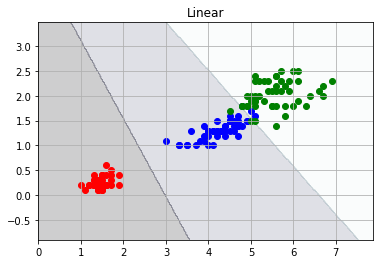

In [15]:
clf=svm.SVC(kernel='linear')
clf.fit(training_data,training_labels)
SVM_plot(clf,'Linear')

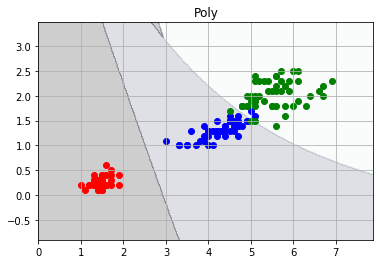

In [16]:
clf=svm.SVC(kernel='poly')
clf.fit(training_data,training_labels)
SVM_plot(clf,'Poly')

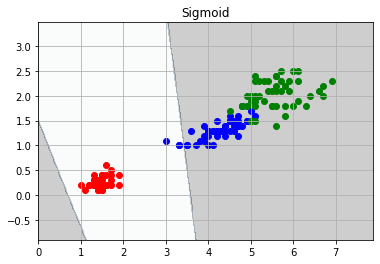

In [17]:
clf=svm.SVC(kernel='sigmoid')
clf.fit(training_data,training_labels)
SVM_plot(clf,'Sigmoid')

# 換特徵

In [18]:
setosa_sepal_length=features[labels=='setosa',0]
setosa_sepal_width=features[labels=='setosa',1]
setosa=np.c_[setosa_sepal_length,setosa_sepal_width]
versicolor_sepal_length=features[labels=='versicolor',0]
versicolor_sepal_width=features[labels=='versicolor',1]
versicolor=np.c_[versicolor_sepal_length,versicolor_sepal_width]
virginica_sepal_length=features[labels=='virginica',0]
virginica_sepal_width=features[labels=='virginica',1]
virginica=np.c_[virginica_sepal_length,virginica_sepal_width]

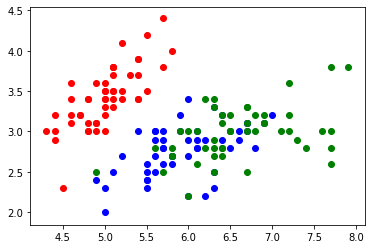

In [19]:
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')

In [20]:
training_data=np.r_[setosa, versicolor, virginica]
training_labels=np.r_[np.zeros(len(setosa)),np.ones(len(versicolor)),np.ones(len(virginica))*2]

In [ ]:
clf=svm.SVC(kernel='poly',C=1000,degree=10) #degree=n次方
clf.fit(training_data,training_labels)
SVM_plot(clf,' ')

In [ ]:
clf=svm.SVC(kernel='sigmoid',C=1000) 
clf.fit(training_data,training_labels)
SVM_plot(clf,' ')

In [ ]:
clf=svm.SVC(kernel='rbf',C=1000) 
clf.fit(training_data,training_labels)
SVM_plot(clf,' ')

# 整體流程

# Step1. 下載資料

In [2]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

# Step2. 區分訓練集與測試集

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)


# Step3. 建模

In [4]:
clf=svm.SVC(kernel='poly',gamma='auto',C=1) #預設為1 3次方
clf.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Step4. 預測

In [5]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

# Step5. 準確度分析

In [6]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

0.9904761904761905
0.9555555555555556
